In [7]:
import numpy as np
import scipy
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from numpy import linalg as LA
import scipy
import gudhi as gd
import json
import sys
from DMT import *
from helpers import *
from s2_6_complex_to_laplacians import build_boundaries, build_laplacians
from s2_5_bipartite_to_complex import extract_simplices
import tri
from random import  uniform
%matplotlib inline

### Example grid

In [8]:
n=4
G = nx.grid_2d_graph(n,n)

In [9]:
mapping  = dict(zip(G, range(1, len(G.edges()))))
nx.relabel.convert_node_labels_to_integers(G)
G = nx.relabel_nodes(G, mapping)
G.edges()

EdgeView([(1, 5), (1, 2), (2, 6), (2, 3), (3, 7), (3, 4), (4, 8), (5, 9), (5, 6), (6, 10), (6, 7), (7, 11), (7, 8), (8, 12), (9, 13), (9, 10), (10, 14), (10, 11), (11, 15), (11, 12), (12, 16), (13, 14), (14, 15), (15, 16)])

In [10]:
K = gd.SimplexTree()

edges = G.edges()

for e in edges:
    K.insert(list(e))
K.expansion(2)
simplices=extract_simplices(K)

In [11]:
boundaries=build_boundaries(simplices)
lap=build_laplacians(boundaries)

In [12]:
eig,eigv= sparse.linalg.eigsh(lap[0], 2, which='SM')
node_str=[str([n]) for n in G.nodes()]
g=dict(zip(node_str,  eigv[:,1]))
#g=dict(zip(node_str,  np.random.rand(n*n)))
d=1

In [13]:
f = build_morse_function(K, d, g)[0]

In [14]:
print(f)

{'[1]': 0.09461189, '[2]': 0.19933139, '[3]': 0.34742737, '[4]': 0.452147, '[5]': -0.06552993, '[6]': 0.039189488, '[7]': 0.18728542, '[8]': 0.2920051, '[9]': -0.29200524, '[10]': -0.18728563, '[11]': -0.03918959, '[12]': 0.06553004, '[13]': -0.45214707, '[14]': -0.34742755, '[15]': -0.19933149, '[16]': -0.094611675, '[1, 2]': 0.14697164297103882, '[1, 5]': 0.014540981501340866, '[2, 3]': 0.273379385471344, '[2, 6]': 0.3064052179182245, '[3, 4]': 0.39978718757629395, '[3, 7]': 0.7321879008747103, '[4, 8]': 0.5374776777600596, '[5, 6]': -0.013170219957828522, '[5, 9]': -0.178767591714859, '[6, 7]': 0.11323745548725128, '[6, 10]': 0.29220000747029895, '[7, 8]': 0.23964525759220123, '[7, 11]': 0.4990047330370465, '[8, 12]': 0.42642427662679594, '[9, 10]': -0.23964543640613556, '[9, 13]': -0.372076153755188, '[10, 11]': -0.11323761194944382, '[10, 14]': 0.17356108483923843, '[11, 12]': 0.01317022554576397, '[11, 15]': 0.35188908989331896, '[12, 16]': 0.11698636352922648, '[13, 14]': -0.399

In [15]:
print(check_Morse(K, f))

True


In [16]:
print(critical_cells(K, f))

[[13], [2, 6], [3, 7], [4, 8], [6, 10], [7, 11], [8, 12], [10, 14], [11, 15], [12, 16]]


In [17]:
V = gradient(K, f)
print(V)


[[[1], [1, 5]], [[2], [1, 2]], [[3], [2, 3]], [[4], [3, 4]], [[5], [5, 9]], [[6], [5, 6]], [[7], [6, 7]], [[8], [7, 8]], [[9], [9, 13]], [[10], [9, 10]], [[11], [10, 11]], [[12], [11, 12]], [[14], [13, 14]], [[15], [14, 15]], [[16], [15, 16]]]


### Example Circle

In [20]:
m=5
circle=[[n%m,(n+1)%m] for n in range(0,m)]
K = gd.SimplexTree()

edges = circle

for e in edges:
    K.insert(list(e))
#K.expansion(2)
simplices=extract_simplices(K)


In [190]:
boundaries=build_boundaries(simplices)
lap=build_laplacians(boundaries) 

In [191]:
eig,eigv= sparse.linalg.eigsh(lap[0],2, which='SM')
node_str=[str([n]) for n in list(simplices[0].values())]
g=dict(zip( node_str ,eigv[:,1]))
#g=dict(zip(node_str,  np.random.rand(m)))

d=1

In [192]:
f = build_morse_function(K, d, g)[0]

In [193]:
print(critical_cells(K, f))

[[4], [2, 3]]


In [194]:
V = gradient(K, f)
print(V)


[[[0], [0, 4]], [[1], [0, 1]], [[2], [1, 2]], [[3], [3, 4]]]


In [195]:
G=nx.Graph()
G.add_edges_from(circle)
lab=list(f.values())[m:]
edg=list(G.edges())
edge_labels=dict()
for i in range(len(edg)):
    edge_labels[edg[i]]= np.round(lab[i],2)
labn=list(f.values())[:m]
nod=list(G.nodes())
node_labels=dict()
for i in range(len(nod)):
    node_labels[nod[i]]= (i,np.round(labn[i],2))


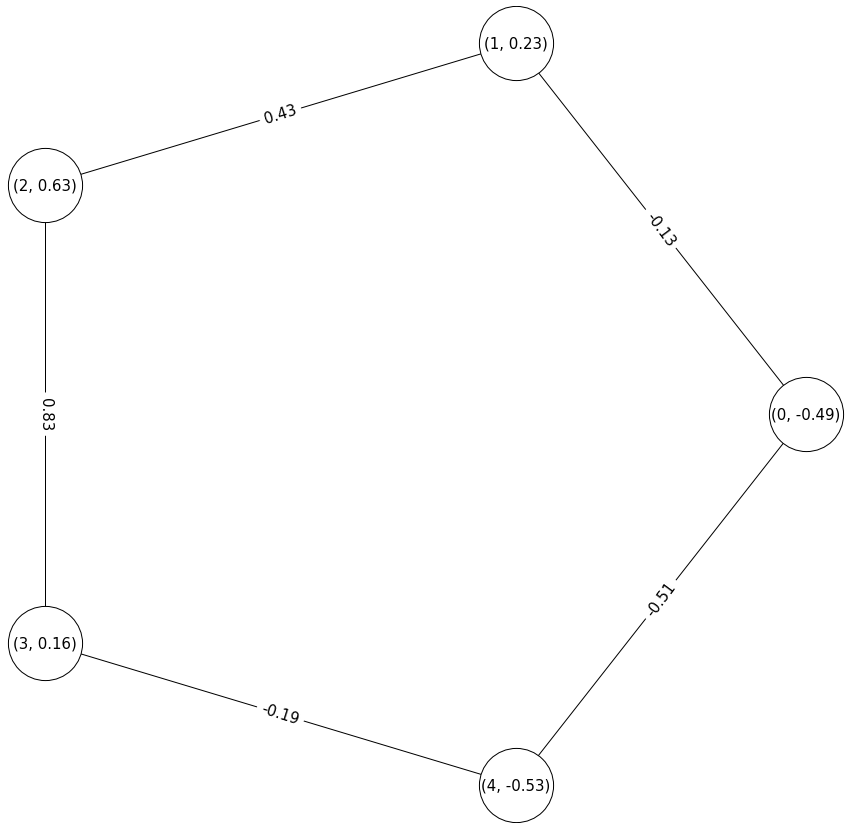

In [196]:
pos = nx.circular_layout(G)

plt.figure(3,figsize=(15,15))

nx.draw_networkx_labels(G,pos, node_labels,font_size=15)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_size=15)

nx.draw(G, pos=pos,node_size=5500,node_color='white')

ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")   
       

plt.savefig("graph.png")
plt.axis('off')
plt.show()

In [161]:
V = gradient(K, f)
print(V)


[[[0], [0, 1]], [[2], [1, 2]], [[3], [2, 3]], [[4], [0, 4]]]


### Example noisy circle

In [235]:
noise=100

g=dict(zip(node_str,  eigv[:,1]+[uniform(-noise, noise) for i in range(m)]))
f = build_morse_function(K, d, g)[0]
print(critical_cells(K, f))

[[0], [3], [1, 2], [3, 4]]


In [236]:
V = gradient(K, f)
print(V)



[[[1], [0, 1]], [[2], [2, 3]], [[4], [0, 4]]]


In [237]:
G=nx.Graph()
G.add_edges_from(circle)
lab=list(f.values())[m:]
edg=list(G.edges())
edge_labels=dict()
for i in range(len(edg)):
    edge_labels[edg[i]]= np.round(lab[i],2)
labn=list(f.values())[:m]
nod=list(G.nodes())
node_labels=dict()
for i in range(len(nod)):
    node_labels[nod[i]]= (i,np.round(labn[i],2))


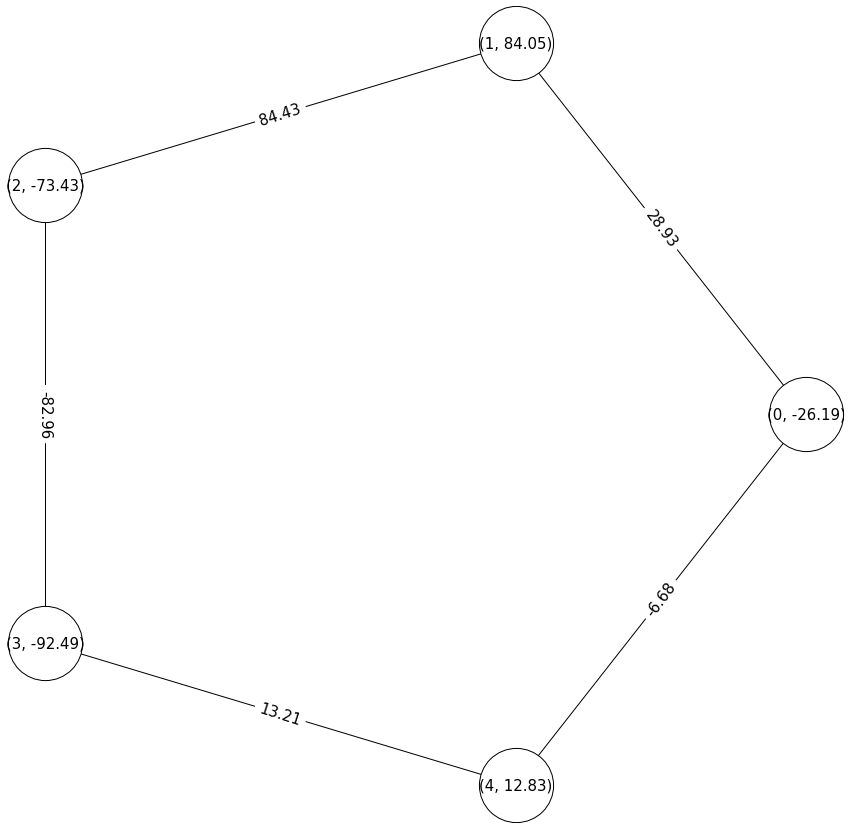

In [238]:
pos = nx.circular_layout(G)

plt.figure(3,figsize=(15,15))

nx.draw_networkx_labels(G,pos, node_labels,font_size=15)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_size=15)

nx.draw(G, pos=pos,node_size=5500,node_color='white')

ax= plt.gca()
ax.collections[0].set_edgecolor("#000000")   
       

plt.savefig("graph.png")
plt.axis('off')
plt.show()

### Torus

In [234]:

simplicesT=tri.tri_perfect_torus(n=4)
st=tri.create_st(simplicesT)
st.persistence(homology_coeff_field=2,min_persistence=-1,persistence_dim_max=2)
print('Betti Numbers')
st.betti_numbers()

Betti Numbers


[1, 2, 1]

In [175]:
list(st.get_skeleton(0))

[([0], 0.0),
 ([5], 0.0),
 ([6], 0.0),
 ([7], 0.0),
 ([9], 0.0),
 ([10], 0.0),
 ([11], 0.0),
 ([13], 0.0),
 ([14], 0.0)]

In [176]:
simplices=extract_simplices(st)
boundaries=build_boundaries(simplices)
lap=build_laplacians(boundaries) 

In [177]:
eig,eigv= sparse.linalg.eigsh(lap[2], 6, which='SM')
node_str=[str(list(st.get_skeleton(0))[n][0]) for n in range(0,len(list(st.get_skeleton(0))))]
g=dict(zip( node_str ,eigv[:,0]))
#g=dict(zip(node_str,  np.random.rand(len(list(st.get_skeleton(0))))))

d=2

In [178]:
print(g)
print(eig)

{'[0]': 0.23570211, '[5]': -0.2357024, '[6]': 0.23570226, '[7]': 0.23570237, '[9]': -0.23570226, '[10]': 0.23570243, '[11]': 0.23570216, '[13]': -0.23570222, '[14]': -0.23570229}
[5.2539690e-07 1.2679474e+00 1.2679484e+00 1.2679489e+00 1.2679490e+00
 1.2679493e+00]


In [179]:
f = build_morse_function(st, d, g)[0]

In [180]:
print(critical_cells(st, f))

[[5], [14], [0, 14], [5, 10], [6, 7], [6, 11], [7, 9], [9, 11], [9, 13], [9, 14], [0, 11, 13], [5, 7, 9], [6, 10, 11], [6, 13, 14], [7, 9, 11], [9, 10, 14]]
